# Code

In [1]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import jupyter_black

jupyter_black.load()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import epiphany as ep

# Data

In [2]:
# Initialize Identity globals from the netrunnerdb database
id_df = ep.get_id_data_from_file("data/cards/cards.json")

In [3]:
# Meta constants for graph titles and filenames
meta = "RWR 2024-05 Banlist"
meta_file_prefix = "rwr-2024-05"

tournaments = [
    ["2024-05-25-brisbane-h1-co", "aesops"],
    ["2024-05-25-calgary-h1-co", "aesops"],
    ["2024-05-25-fly-to-emea-online-gnk", "aesops"],
    ["2024-05-25-nanpc-boston", "aesops"],
    ["2024-05-25-st-petersburg-h1-co", "aesops"],
    ["2024-05-26-warwick-h1-co", "aesops"],
    ["2024-06-01-american-continental-online", "aesops"],
    ["2024-06-02-sansan-south-gnk", "aesops"],
    ["2024-06-02-worcester-co-h1", "aesops"],
]

In [4]:
# load data for all tournaments
flattened_matches, paired_matches = ep.aggregate_tournament_data(id_df, tournaments)

In [5]:
paired_matches.to_csv(f"output/{meta_file_prefix}-paired-matches.csv")

# ID Win Rates

In [6]:
ep.get_runner_win_rate(flattened_matches)

,runnerIdentity,total_wins,matches_played,win_ratio
0,Rielle “Kit” Peddler,21,36,0.583333
1,Arissana Rocha Nahu,82,141,0.581560
2,Los,2,4,0.500000
3,Captain Padma Isbister,2,4,0.500000
4,Steve Cambridge,9,18,0.500000
5,Akiko Nisei,5,10,0.500000
6,Mercury,5,10,0.500000
7,"Nyusha ""Sable"" Sintashta",33,66,0.500000
8,Esâ Afontov,34,70,0.485714
9,Ken “Express” Tenma,12,25,0.480000


In [7]:
ep.get_corp_win_rate(flattened_matches)

,corpIdentity,total_wins,matches_played,win_ratio
0,Thunderbolt Armaments,2,3,0.666667
1,Restoring Humanity,15,25,0.600000
2,Sportsmetal,67,113,0.592920
3,Pravdivost Consulting,7,12,0.583333
4,Asa Group,27,47,0.574468
5,Issuaq Adaptics,16,28,0.571429
6,Thule Subsea,20,37,0.540541
7,Azmari EdTech,40,75,0.533333
8,Precision Design,42,83,0.506024
9,MirrorMorph,3,6,0.500000


# Matchup Matrix

<Axes: title={'center': 'RWR 2024-05 Banlist - 3+ obs - Corp Win Rates (Number is Total Games Played)'}, xlabel='runner', ylabel='corp'>

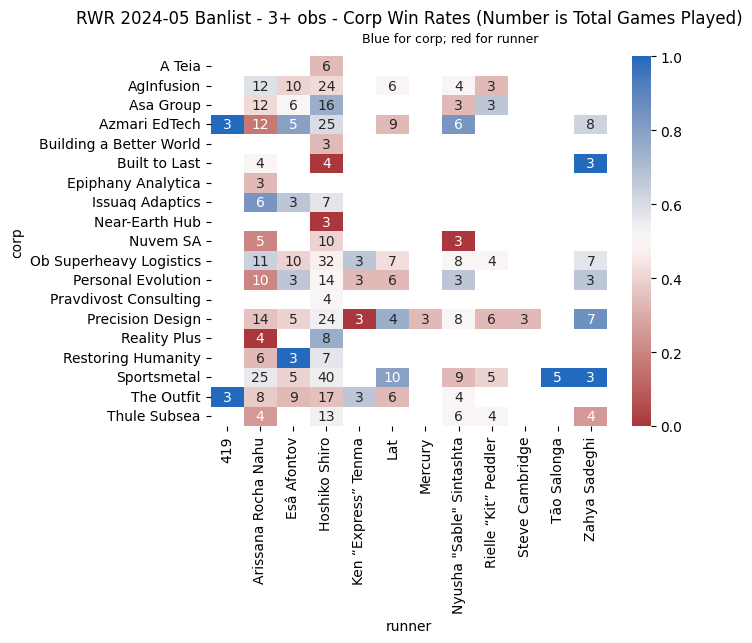

In [8]:
ep.get_heatmap(meta, ep.get_paired_winrate(paired_matches), 2)

# Popularity Over Time

In [9]:
corp_popularity_by_month_pct = ep.get_corp_popularity_by_month(flattened_matches)

In [10]:
runner_popularity_by_month_pct = ep.get_runner_popularity_by_month(flattened_matches)

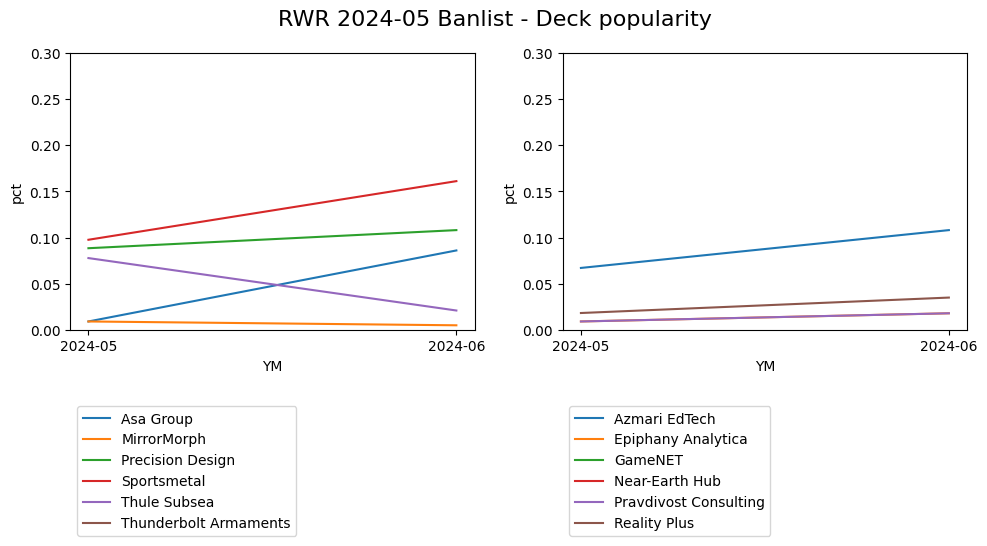

In [11]:
ep.plot_corp_popularity_two_up(
    corp_popularity_by_month_pct,
    f"{meta} - Deck popularity",
    ep.hb,
    ep.nbn,
)

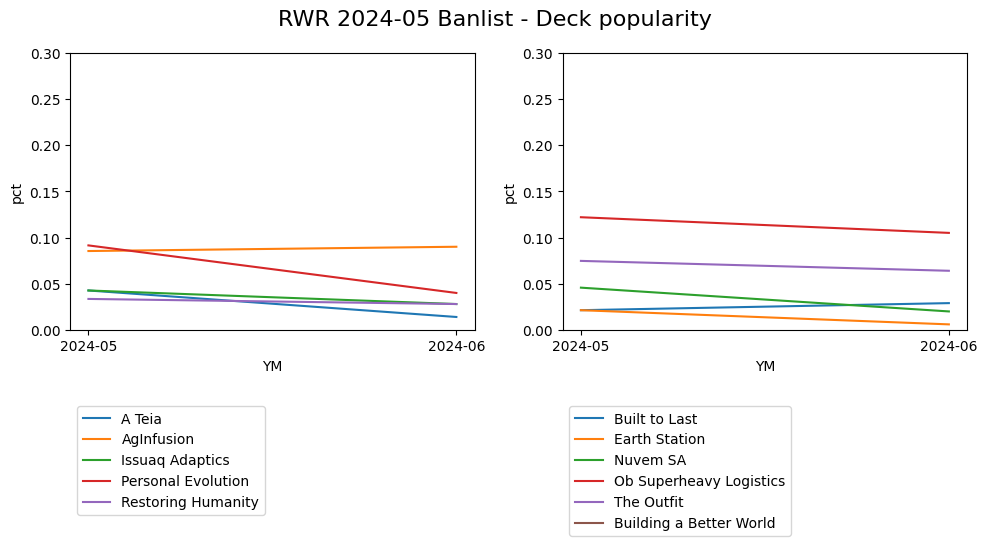

In [12]:
ep.plot_corp_popularity_two_up(
    corp_popularity_by_month_pct,
    f"{meta} - Deck popularity",
    ep.jinteki,
    ep.weyland,
)

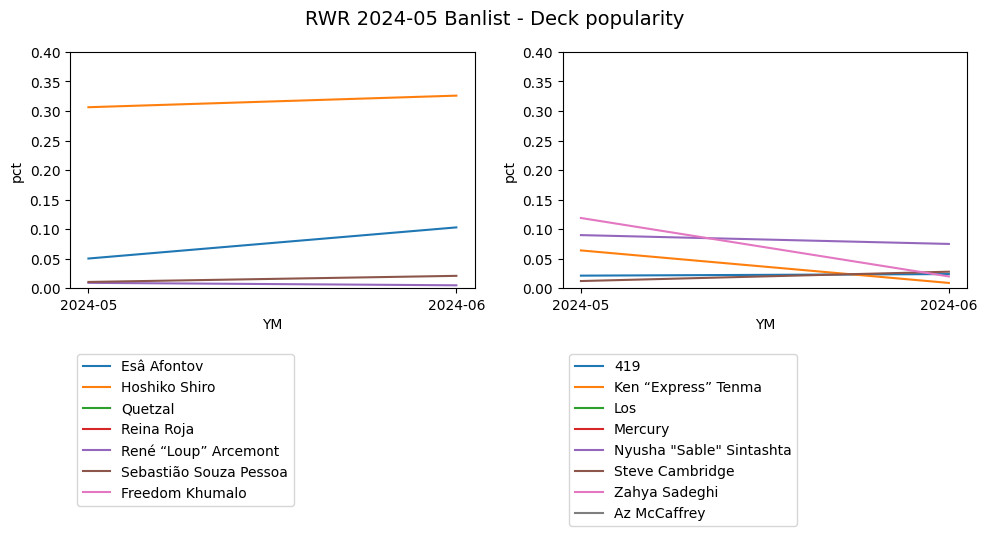

In [13]:
ep.plot_runner_popularity_two_up(
    runner_popularity_by_month_pct,
    f"{meta} - Deck popularity",
    ep.anarch,
    ep.criminal,
)

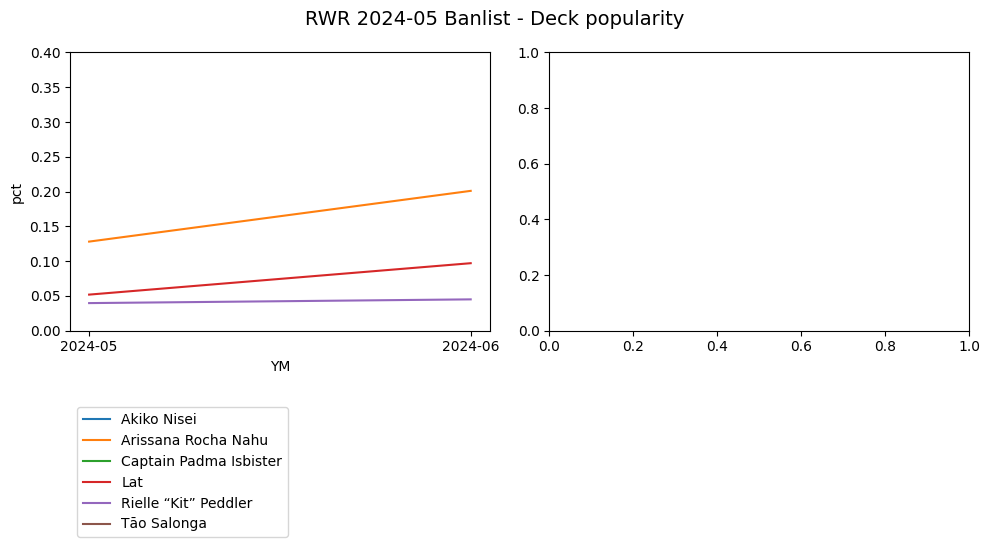

In [14]:
ep.plot_runner_popularity_two_up(
    runner_popularity_by_month_pct,
    f"{meta} - Deck popularity",
    ep.shaper,
    "",  # disable graph
)

# Deck Win Rates Over Time

In [15]:
corp_win_rate_by_event_month = ep.get_corp_win_rate_by_event_month(flattened_matches)

In [16]:
runner_win_rate_by_event_month = ep.get_runner_win_rate_by_event_month(flattened_matches)

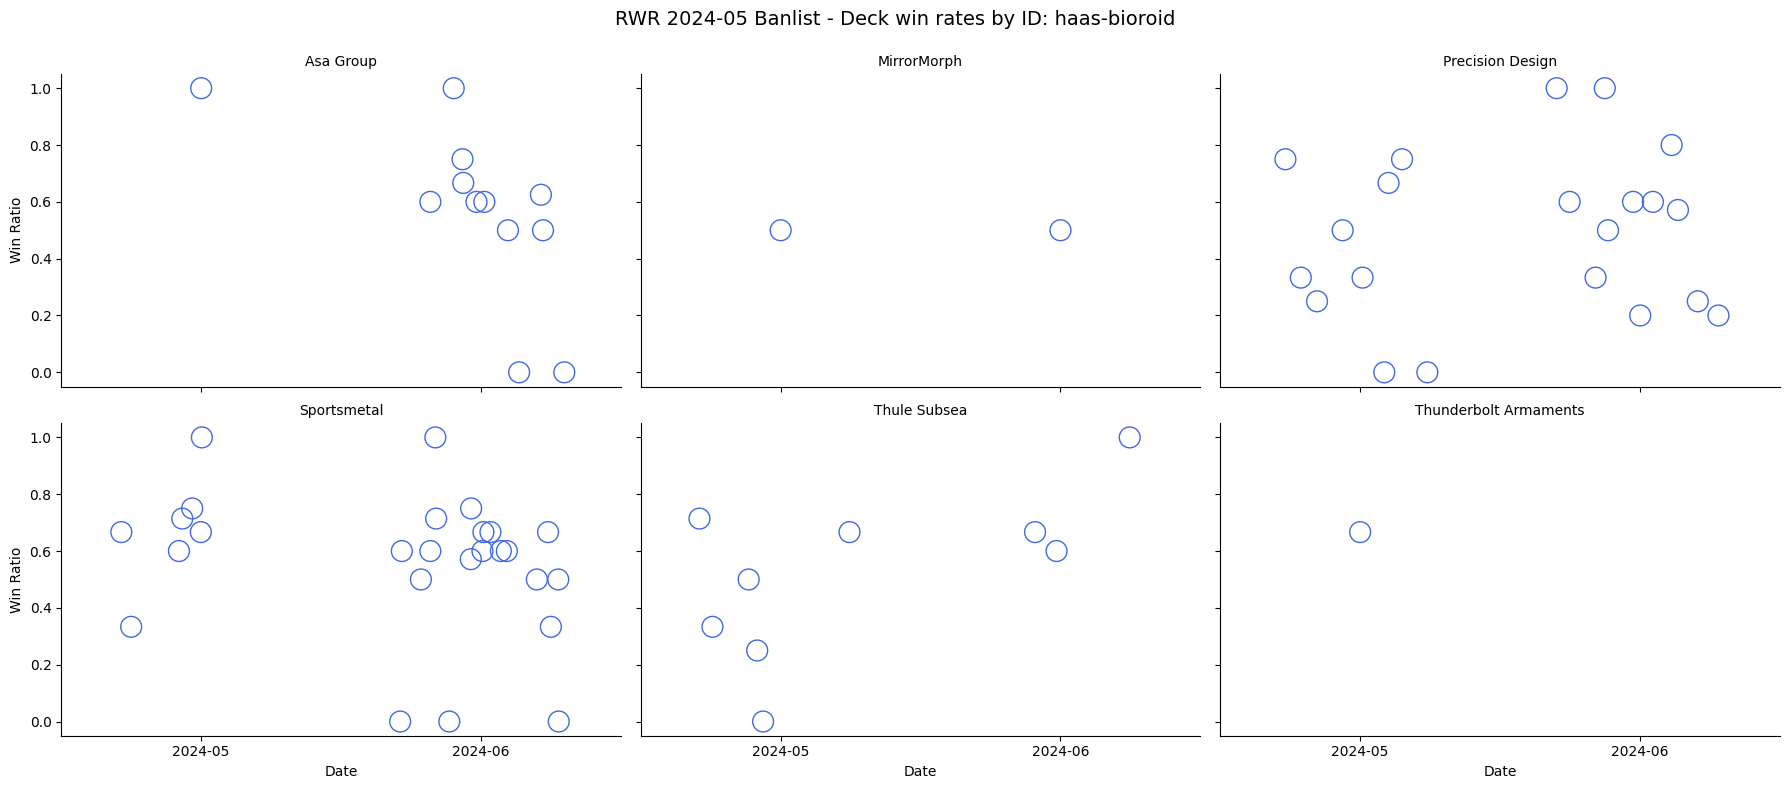

In [17]:
ep.plot_corp_win_rate_over_time(
    corp_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.hb
)

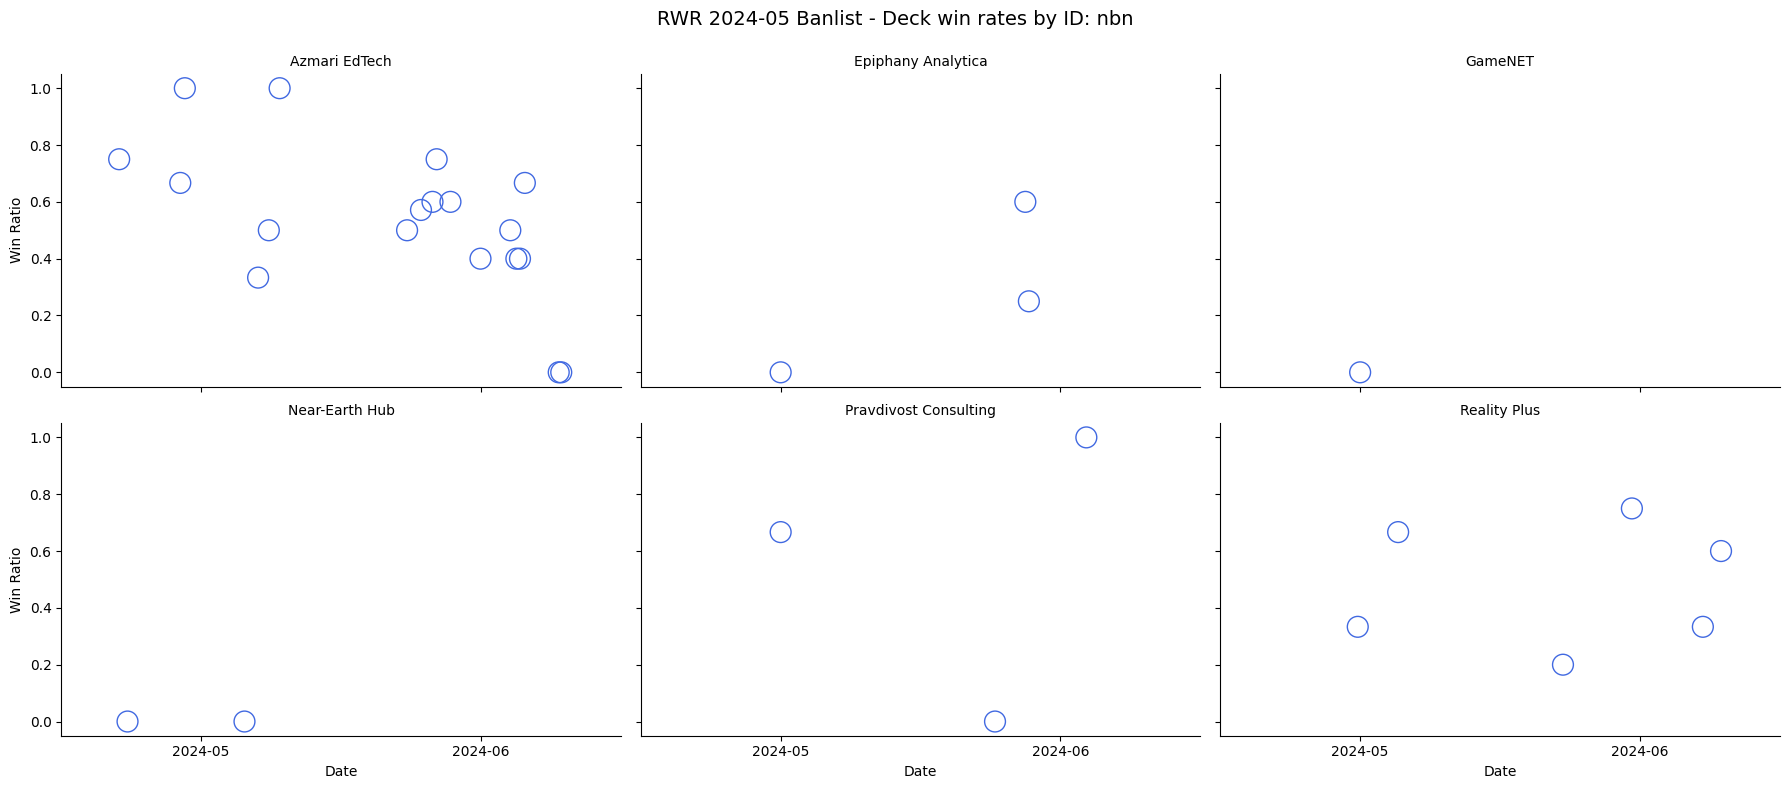

In [18]:
ep.plot_corp_win_rate_over_time(
    corp_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.nbn
)

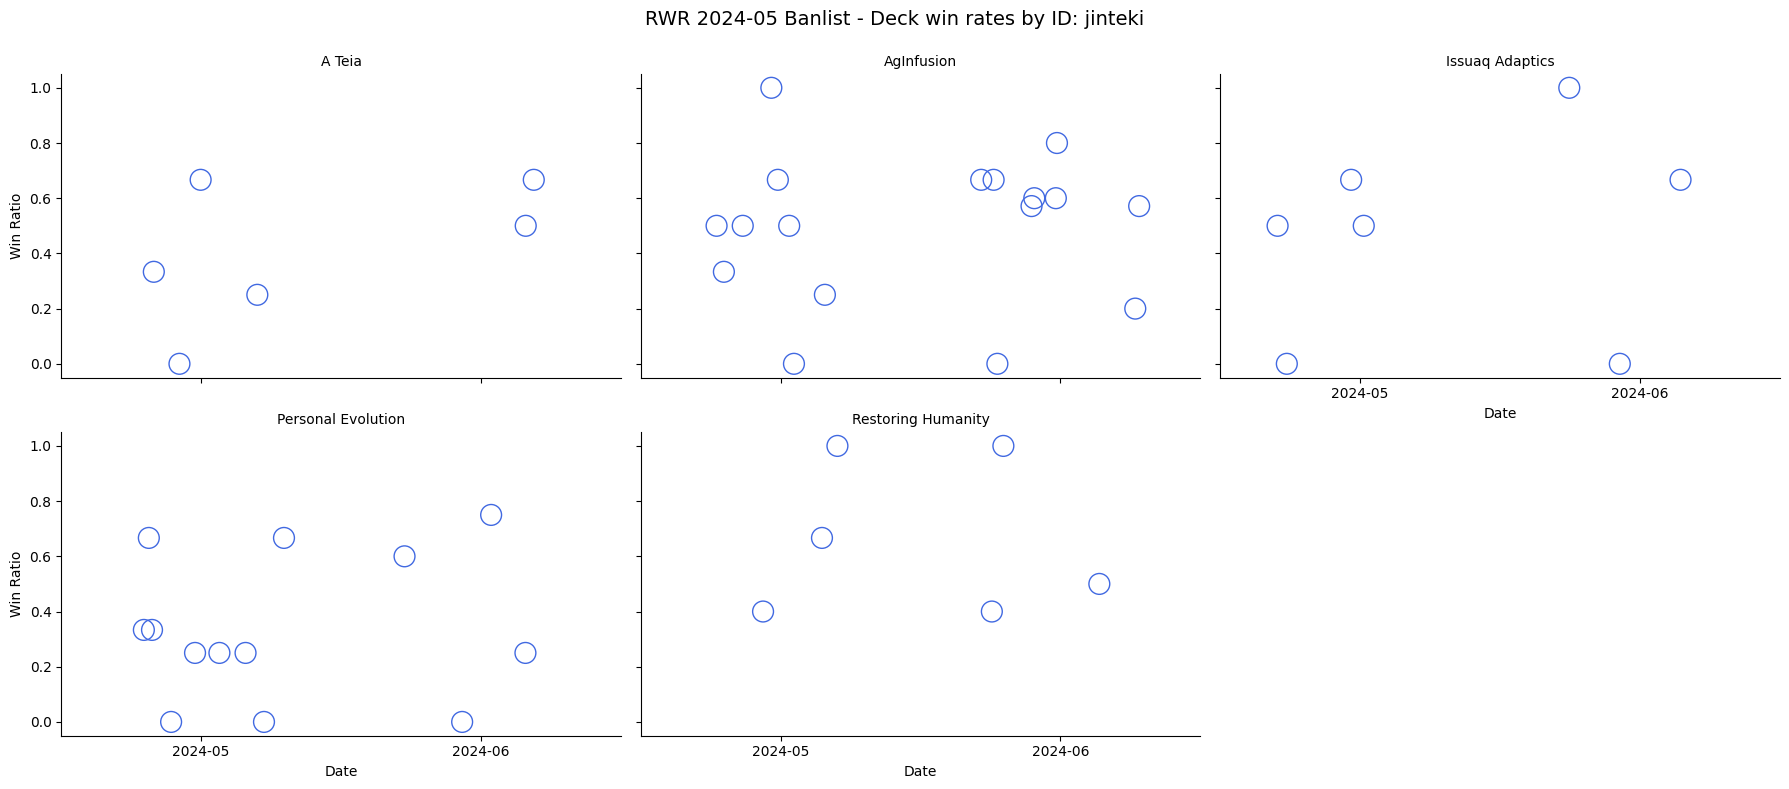

In [19]:
ep.plot_corp_win_rate_over_time(
    corp_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.jinteki
)

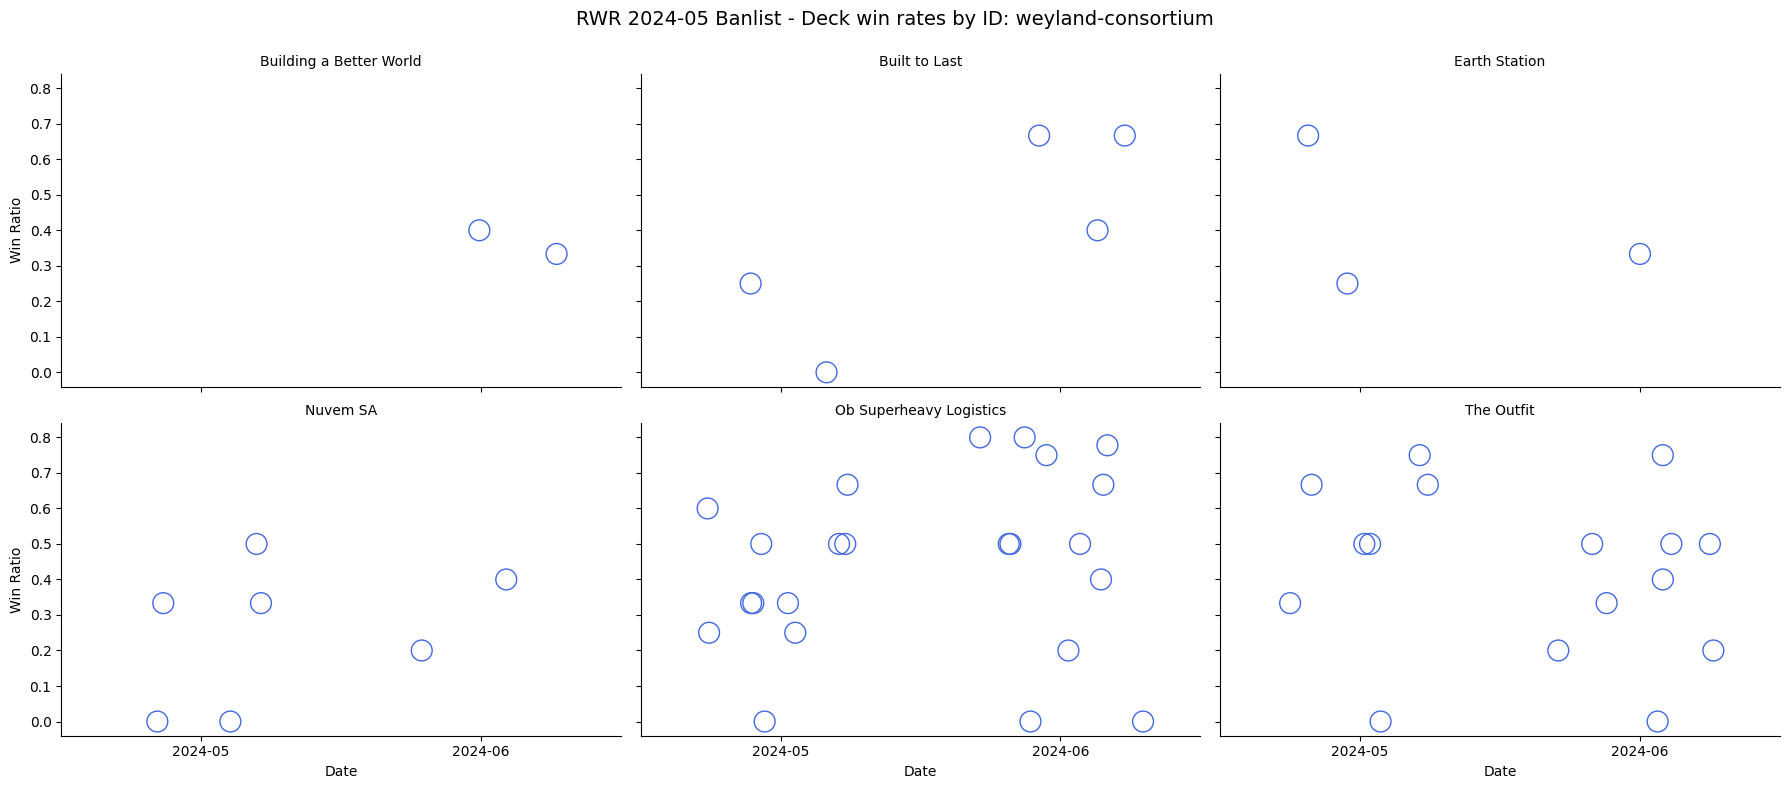

In [20]:
ep.plot_corp_win_rate_over_time(
    corp_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.weyland
)

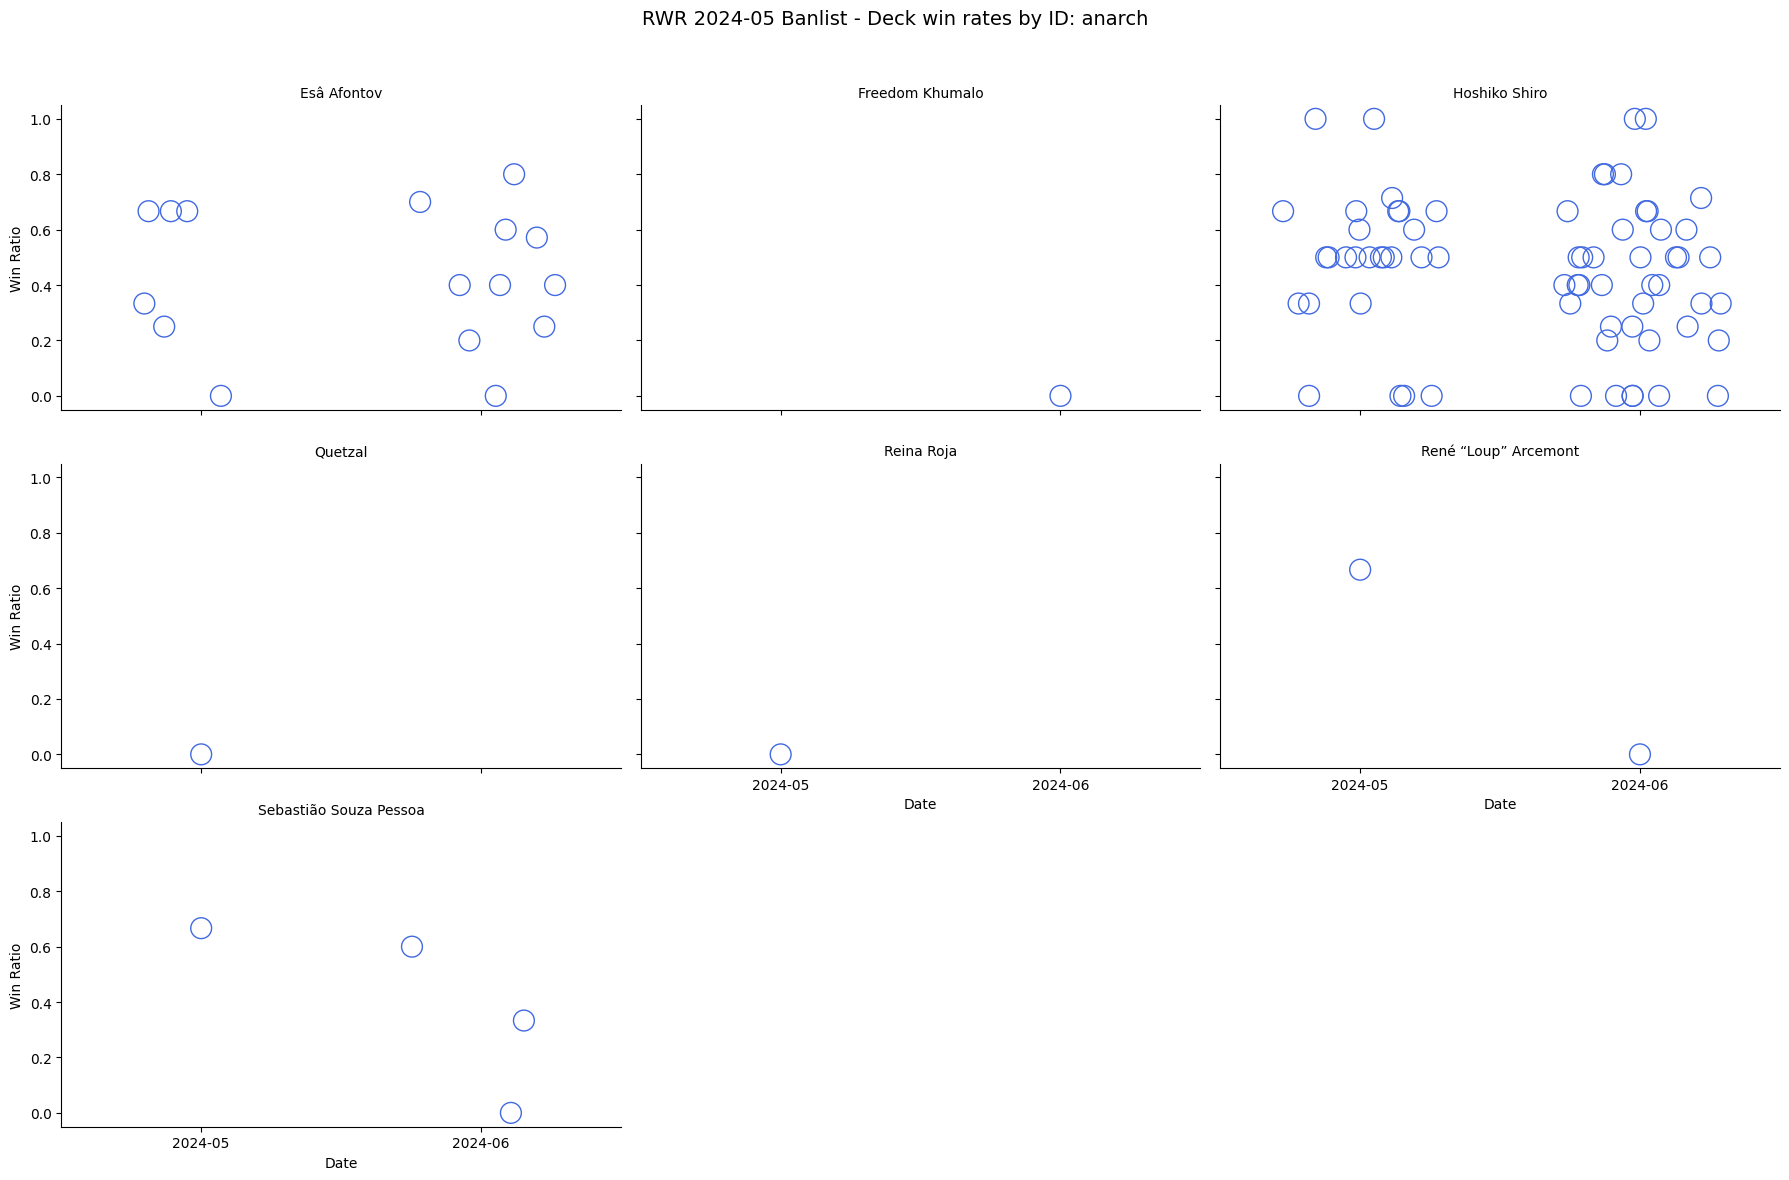

In [21]:
ep.plot_runner_win_rate_over_time(
    runner_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.anarch
)

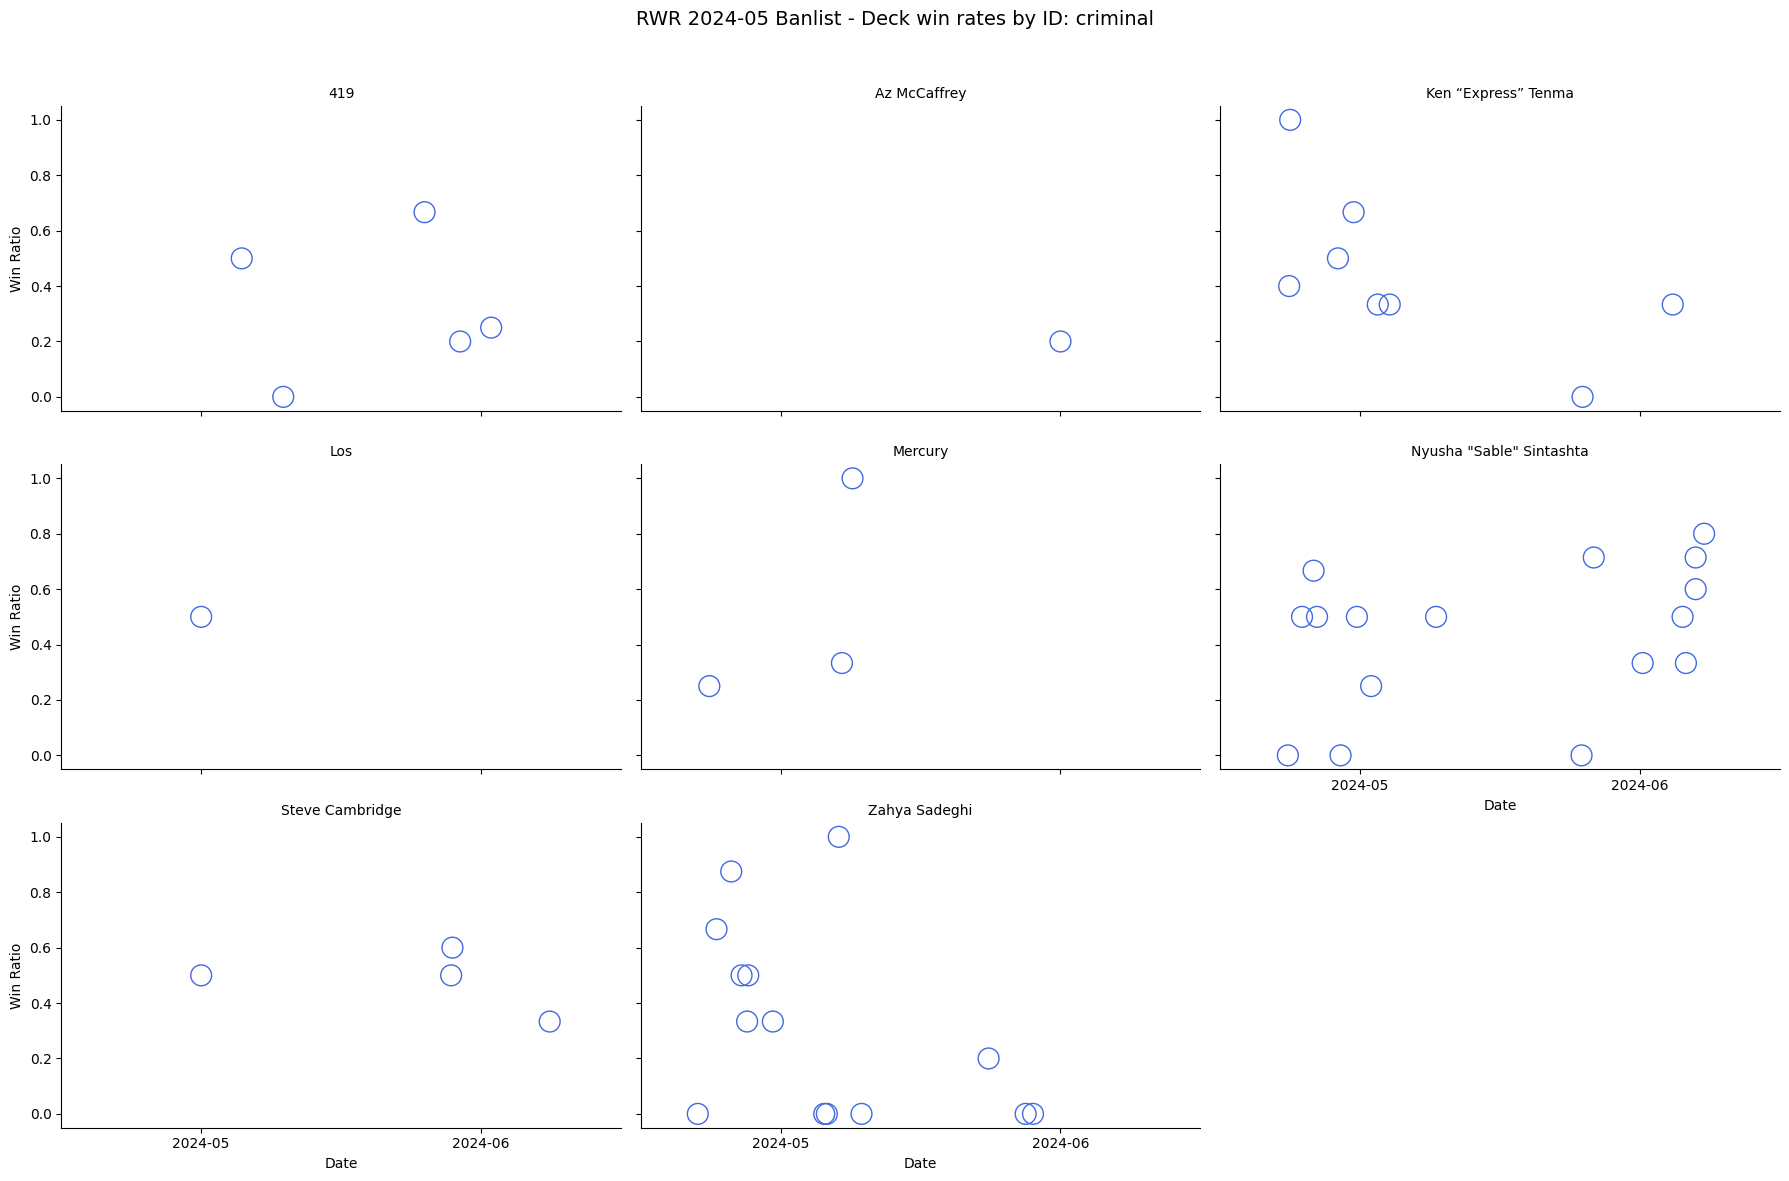

In [22]:
ep.plot_runner_win_rate_over_time(
    runner_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.criminal
)

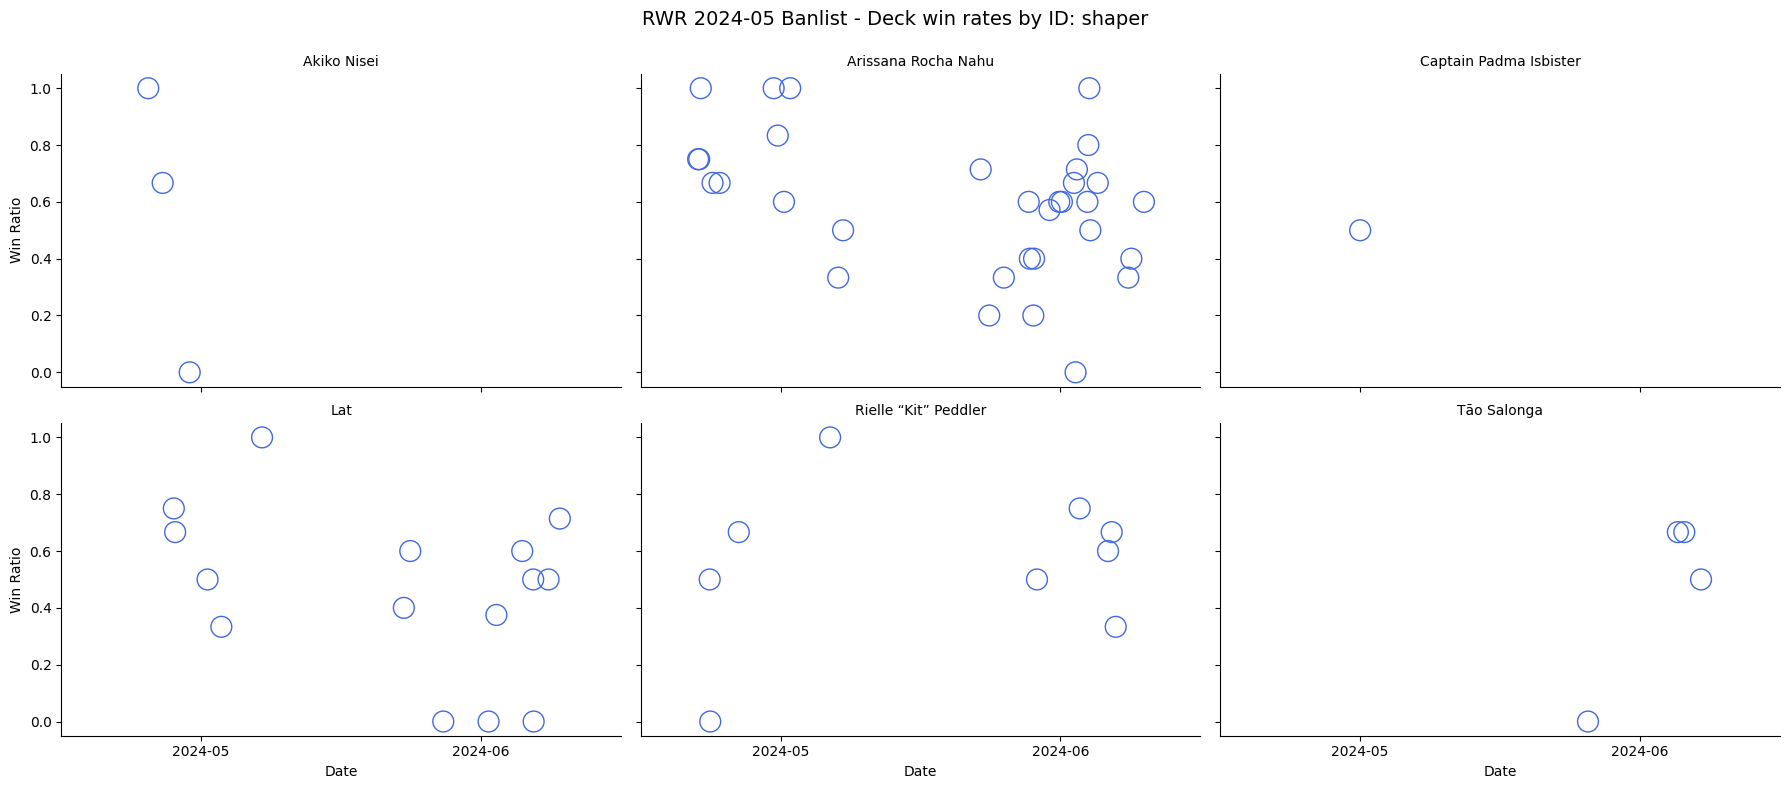

In [23]:
ep.plot_runner_win_rate_over_time(
    runner_win_rate_by_event_month, f"{meta} - Deck win rates by ID", ep.shaper
)

In [24]:
best_corp_decks = corp_win_rate_by_event_month.sort_values(
    by="win_ratio", ascending=False
).reset_index(drop=True)
best_corp_decks[(best_corp_decks["matches_played"] > 3)].head(20)

,event,YM,id,name,corpIdentity,corpFaction,total_wins,matches_played,win_ratio
3,2024 American Continental Championship,2024-06,3911,Hectorest,Issuaq Adaptics,jinteki,8,8,1.000000
5,Fly to EMEA #3,2024-05,3755,AugustusCaesar,AgInfusion,jinteki,4,4,1.000000
10,2024 American Continental Championship,2024-06,3972,Gathzen,Pravdivost Consulting,nbn,5,5,1.000000
14,2024 American Continental Championship,2024-06,3877,Agasha,AgInfusion,jinteki,4,5,0.800000
15,2024 American Continental Championship,2024-06,3888,cablooshe,Ob Superheavy Logistics,weyland-consortium,4,5,0.800000
16,2024 American Continental Championship,2024-06,3880,arlekj,Ob Superheavy Logistics,weyland-consortium,4,5,0.800000
17,2024 American Continental Championship,2024-06,3956,techgin,Precision Design,haas-bioroid,4,5,0.800000
18,2024 American Continental Championship,2024-06,3914,jan tuno,Ob Superheavy Logistics,weyland-consortium,7,9,0.777778
19,NANPC Boston,2024-05,3829,Toby,Precision Design,haas-bioroid,3,4,0.750000
20,2024 American Continental Championship,2024-06,3964,tzeentchling,Reality Plus,nbn,3,4,0.750000


In [25]:
best_runner_decks = runner_win_rate_by_event_month.sort_values(
    by="win_ratio", ascending=False
).reset_index(drop=True)
best_runner_decks[(best_runner_decks["matches_played"] > 3)].head(20)

,event,YM,id,name,runnerIdentity,runnerFaction,total_wins,matches_played,win_ratio
2,2024 American Continental Championship,2024-06,3958,The King,Hoshiko Shiro,anarch,4,4,1.000000
4,NANPC Boston,2024-05,3809,Ysengrin,Arissana Rocha Nahu,shaper,4,4,1.000000
5,NANPC Boston,2024-05,3789,Winston Gao,Ken “Express” Tenma,criminal,4,4,1.000000
14,NANPC Boston,2024-05,3830,eric k,Zahya Sadeghi,criminal,7,8,0.875000
15,NANPC Boston,2024-05,3797,Alex Boyd,Arissana Rocha Nahu,shaper,5,6,0.833333
16,2024 American Continental Championship,2024-06,3931,oggbonaian,"Nyusha ""Sable"" Sintashta",criminal,4,5,0.800000
17,2024 American Continental Championship,2024-06,3951,sruman,Hoshiko Shiro,anarch,4,5,0.800000
18,2024 American Continental Championship,2024-06,3953,Styx,Esâ Afontov,anarch,4,5,0.800000
19,2024 American Continental Championship,2024-06,3902,emmel,Hoshiko Shiro,anarch,4,5,0.800000
20,2024 American Continental Championship,2024-06,3971,ArminFirecracker,Arissana Rocha Nahu,shaper,4,5,0.800000


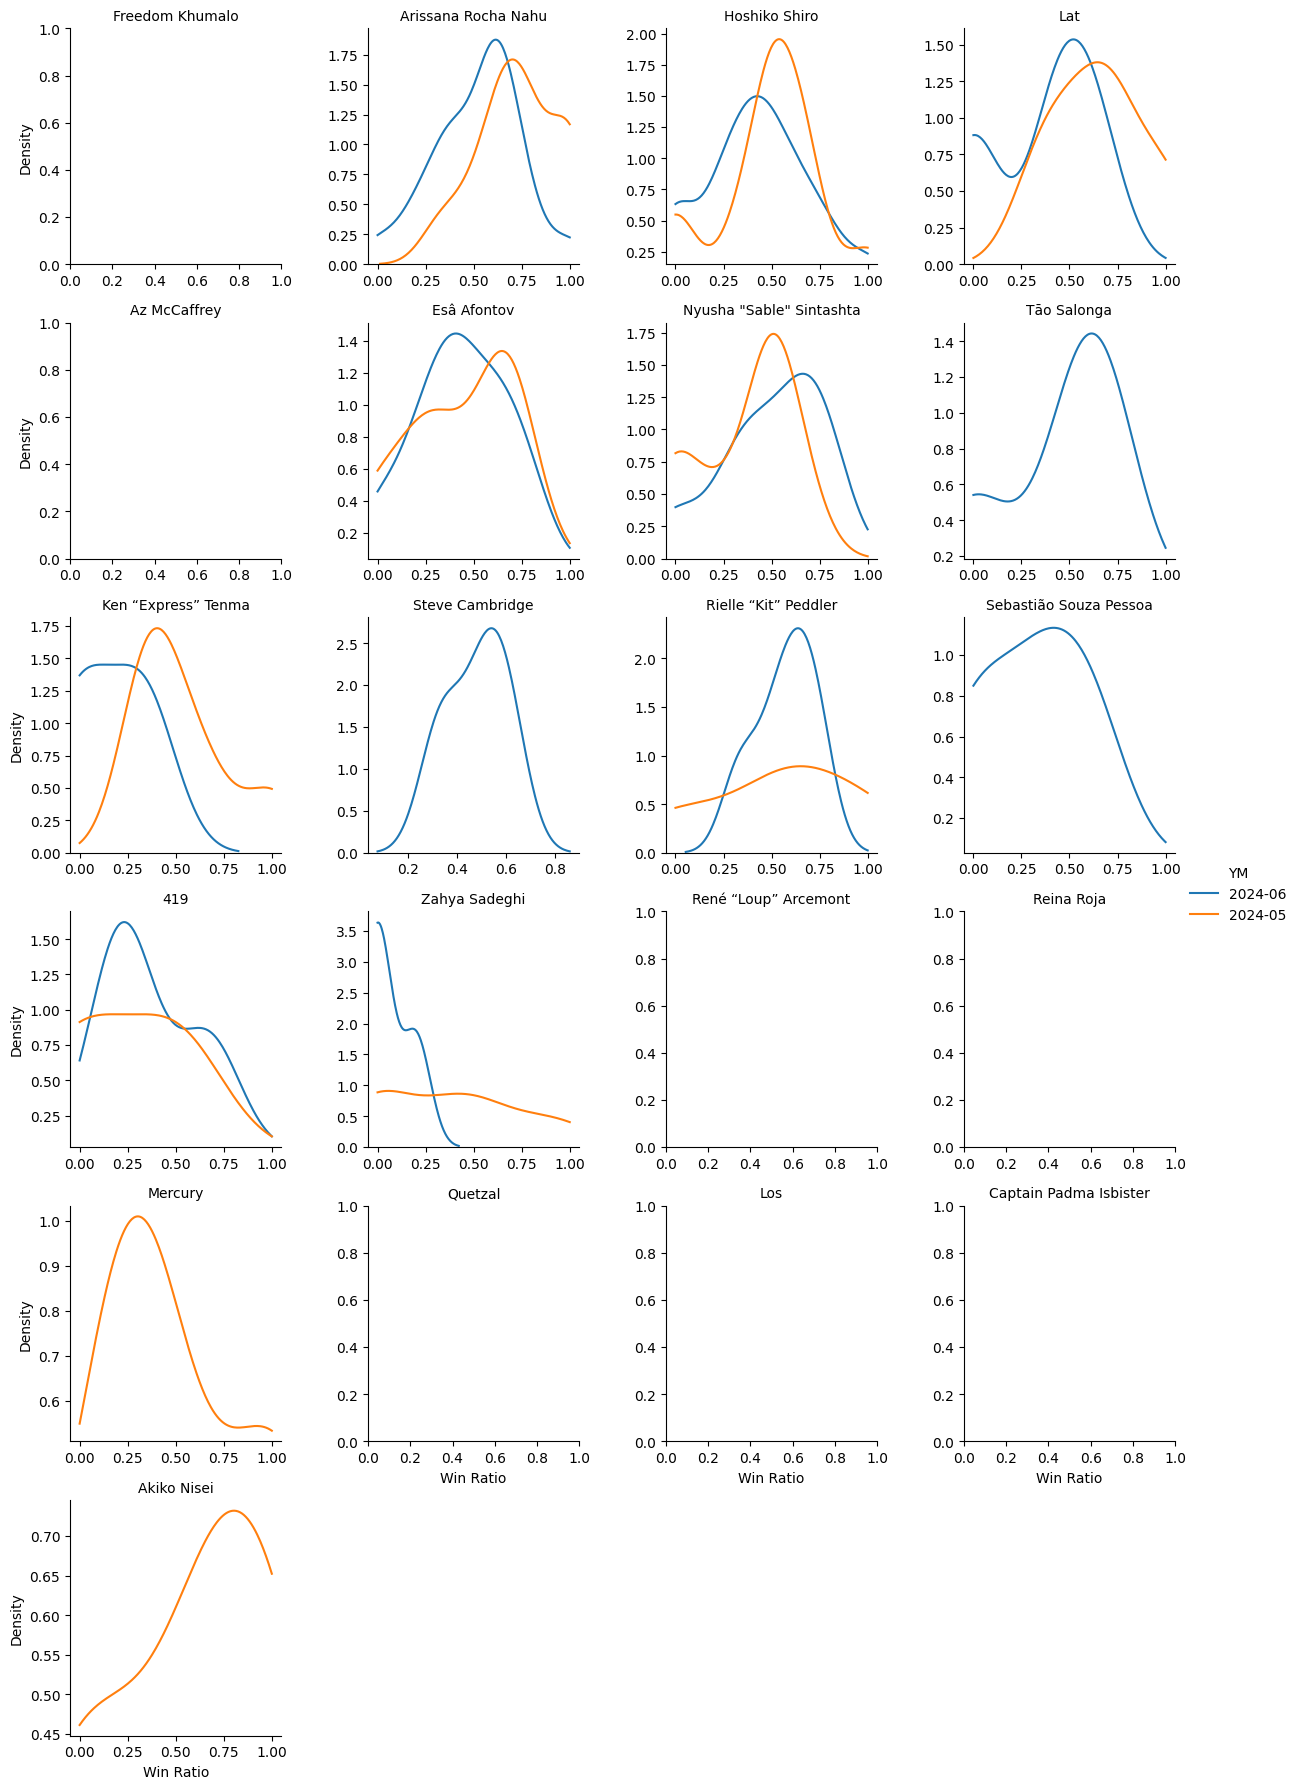

In [27]:
g = sns.FacetGrid(
    runner_win_rate_by_event_month,
    col="runnerIdentity",
    hue="YM",
    col_wrap=4,
    sharex=False,
    sharey=False,
)

# Map the kdeplot to each facet
g.map(sns.kdeplot, "win_ratio", fill=False, warn_singular=False, clip=[0, 1], bw_adjust=0.8)

# Adjust the layout and add titles
g.add_legend()
g.set_axis_labels("Win Ratio", "Density")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()